# T-test

In [28]:
import os, sys
sys.path

['/home/miruware/anaconda3/envs/env3_tf1/lib/python36.zip',
 '/home/miruware/anaconda3/envs/env3_tf1/lib/python3.6',
 '/home/miruware/anaconda3/envs/env3_tf1/lib/python3.6/lib-dynload',
 '',
 '/home/miruware/.local/lib/python3.6/site-packages',
 '/home/miruware/anaconda3/envs/env3_tf1/lib/python3.6/site-packages',
 '/home/miruware/anaconda3/envs/env3_tf1/lib/python3.6/site-packages/IPython/extensions',
 '/home/miruware/.ipython',
 '/home/miruware/aProjects/lib']

In [53]:
import os, sys
import numpy as np
from scipy import stats
import sonyalib as sonya
import seaborn as sns
import random

## 1-Sample T-test (단일 표본 t-검정)
전체 학생들 중 20명의 학생들을 추려 키를 재서 전체 학생들의 평균 키가 175cm인지 아닌지 알아보고 싶다.<br>
- 귀무 가설: 학생들의 평균 키가 175cm이다.
- 대립 가설: 학생들의 평균 키가 175cm가 아니다.  


scipy.stats의 ttest_1samp메소드를 이용한다



In [14]:
import numpy as np
from scipy import stats
 
#to get consistent result
np.random.seed(1)
 
#generate 20 random heights with mean of 180, standard deviation of 5
heights= [180 + np.random.normal(0,5)for _ in range(20)]
 
#perform 1-sample t-test
tTestResult = stats.ttest_1samp(heights,175)
 
#print result
print("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)

The T-statistic is 3.435 and the p-value is 0.003


p-value 가 0.003으로, 기각역을 p < 0.05로 설정했을 때 귀무 가설을 기각한다. 즉, 귀무 가설이 참일때 (학생들의 실제 평균 키가 175cm일때) 위와 같은 표본을 얻을 확률이 0.003으로, 학생들의 평균 키는 175cm가 아니라고 할 수 있다.

## Unpaired T-test(독립 표본 t-검정)
집단 1과 집단 2에서 각각 20명의 학생들을 추려, 각 집단의 키가 같은지, 다른지 알아보고 싶다.<br>
- 귀무 가설: 두 집단의 평균 키는 같다.
- 대립 가설: 두 집단의 평균 키는 같지 않다.(양측 검정).  


scipy.stats 의 ttest_ind 메소드를 이용한다. (two INDependent sample이라 해서 ttest_ind )

In [15]:
import numpy as np
from scipy import stats
 
#to get consistent result
np.random.seed(1)
 
#group 1 heights : mean 170, standard deviation 5
group1Heights= [170 + np.random.normal(0,5)for _ in range(20)]
#group 2 heights : mean 180, standard deviation 10
group2Heights= [175 + np.random.normal(0,10)for _ in range(20)]
 
#perform t-test assuming equal variances
tTestResult= stats.ttest_ind(group1Heights, group2Heights)
 
#perform t-test NOT assuming equal variances
tTestResultDiffVar= stats.ttest_ind(group1Heights, group2Heights, equal_var=False)
 
print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)


The t-statistic and p-value assuming equal variances is -2.329 and 0.025.
The t-statistic and p-value not assuming equal variances is -2.329 and 0.026


기각역이 p < 0.05일때 귀무 가설을 기각한다. 즉, 두 집단의 평균 키는 같지 않다.
두 집단의 분산이 같다고 가정했을 때보다 같지 않다고 가정했을 때 p-value가 높게 나타난다. 실제로 분산이 같지 않을 때 등분산을 가정하면 p-value가 낮게 나타나 실제로 그 차이가 유의미하지 않음에도 유의미하다고 해석할 수 있다. 주의하자.<br><br>
참고) 등분산을 가정하지 않으면 Welch's T-test를 수행한다.


## Paired T-test(독립 표본 t-검정)
다이어트 약을 복용한 사람들 중 20명을 추려 복용 전/후의 체중 차이가 유의미한지 알아보고 싶다.<br>
- 귀무 가설: 복용 전/후의 체중 차이가 없다.
- 대립 가설: 복용 전/후의 체중 차이가 있다.  


scipy.stats 의 ttest_rel 메소드를 이용한다. (two RELated samples)

In [16]:
import numpy as np
from scipy import stats
 
#to get consistent result
np.random.seed(1)
 
#before treatment : mean 60, standard deviation 5
beforeWeights= [60 + np.random.normal(0,5)for _ in range(20)]
#after treatment : mean 0.99-fold decrease, standard deviation 0.02
afterWeights= [w * np.random.normal(0.99,0.02)  for w in beforeWeights]
 
 #perform paired t-test
tTestResult= stats.ttest_rel(beforeWeights, afterWeights)
 
print("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)

The T-statistic is 2.915 and the p-value is 0.009


In [37]:
len(beforeWeights), len(afterWeights)

(20, 20)

기각역 p < 0.05에서 귀무 가설을 기각한다. 즉, 다이어트 약 복용 전/후에 체중 차이는 유의미하다고 할 수 있다.  

In [30]:
PATH_EXCEL = './BRC2019_CRF_merged_200923 완료.xlsx'
metadata = sonya.get_metadata(PATH_EXCEL)


In [32]:
df_filtered = metadata.dropna(axis=0, how='any').reset_index(drop=True)  # NaN drop
properties = list(df_filtered.columns.values)
properties.remove('label')
# properties.remove('cN')
properties.remove('ID')
# X_origin = df_filtered['cN']
X_origin = df_filtered[properties]
y_origin = df_filtered['label']

In [34]:
df_filtered

,ID,L/R,age,cT,aAverage,aSD,cAverage,cSD,hu_diff,homogeneous,cN,hetero,rim,clustered,non-mass,label
0,0130983,1,79.0,0.2000,0.526992,0.282759,0.387231,0.442197,0.611257,1.00,0.00,0,0,0,0,1.0
1,0130984,0,59.0,0.1375,0.337404,0.427586,0.675920,0.277457,0.237244,1.00,0.00,0,0,0,0,1.0
2,0130985,0,64.0,0.1875,0.375964,0.165517,0.439278,0.222543,0.448185,1.00,0.00,0,0,0,0,1.0
3,0130990,0,56.0,0.1125,0.381748,0.227586,0.321305,0.095376,0.542346,0.75,0.25,0,0,0,0,0.0
4,0119330,1,55.0,0.1875,0.258997,0.131034,0.374740,0.208092,0.401368,0.50,0.25,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0131733,0,47.0,0.3125,0.548843,0.213793,0.598196,0.130058,0.469227,0.00,0.50,0,0,0,1,0.0
276,0131739,1,56.0,0.0875,0.193445,0.420690,0.280361,0.234104,0.419253,0.75,0.75,0,0,0,0,1.0
277,0131744,0,37.0,0.1375,0.195373,0.096552,0.451770,0.251445,0.290900,0.75,0.00,0,0,0,0,1.0
278,0131747,1,69.0,0.2250,0.330977,0.331034,0.486468,0.213873,0.375592,1.00,0.25,0,0,0,0,1.0


<AxesSubplot:xlabel='label'>

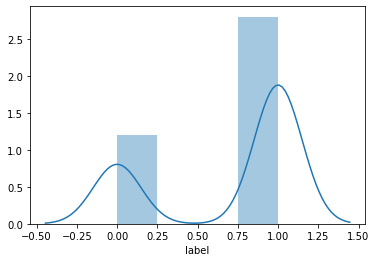

In [36]:
sns.distplot(df_filtered['label'])

In [51]:
len(label_negative), len(label_positive)

(84, 196)

In [50]:
label_negative = [df_filtered['cT'][n] for n, nLabel in enumerate(df_filtered['label']) if int(nLabel) is 0]
label_positive = [df_filtered['cT'][n] for n, nLabel in enumerate(df_filtered['label']) if int(nLabel) is 1]

In [54]:
random_positive = random.choices(population=label_positive, k=len(label_negative))
tTestResult= stats.ttest_rel(label_negative, random_positive)
 
print("The T-statistic is %.3f and the p-value is %.3f" % tTestResult)

The T-statistic is 2.790 and the p-value is 0.007
